# Описание ДЗ-1.

В первой домашке вы обучите свою первую нейронку.

За дз можно получить максимум 10 баллов. **Домашки довольно творческие, если замечу копию нотбука у другого студента то максимальный балл сниижается до 3 )**

Разбалловка:
*   **Воспроизводимость и читабельность кода - 6 баллов** (все воспроизвелось и все понятно для проверяющего - 6 баллов; есть непонятные моменты, но все воспроизвелось - 4 балла; непонятный код и/или воспроизводится с небольшой правкой - 2 балл; непонятный код и/или ничего не воспроизвелось - 0 баллов).
*   **Технический отчет - 4 балла** (приведены результаты сравнения и выводы что сделали чтоб перебить baseline\другую модель, к примеру одна модель лучше/хуже нейронки и тд - 4 балла, только результаты - 2 балл, ничего нет - 0 баллов).


Присылать домашки по ссылке https://forms.gle/W8jwbwA4EWagEbX66

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv',index_col=0)

In [4]:
df.head()

x1        x2  y
0 -4.626272 -6.658988  0
1 -7.789640  0.262519  0
2 -8.739678  1.537758  0
3 -2.546441 -7.705224  0
4 -2.751506 -7.940187  0

Как и в любой задаче машинного обучения для начала надо визуализировать данные.
Не зря же нашу нейронную сеть мы так долго учим?


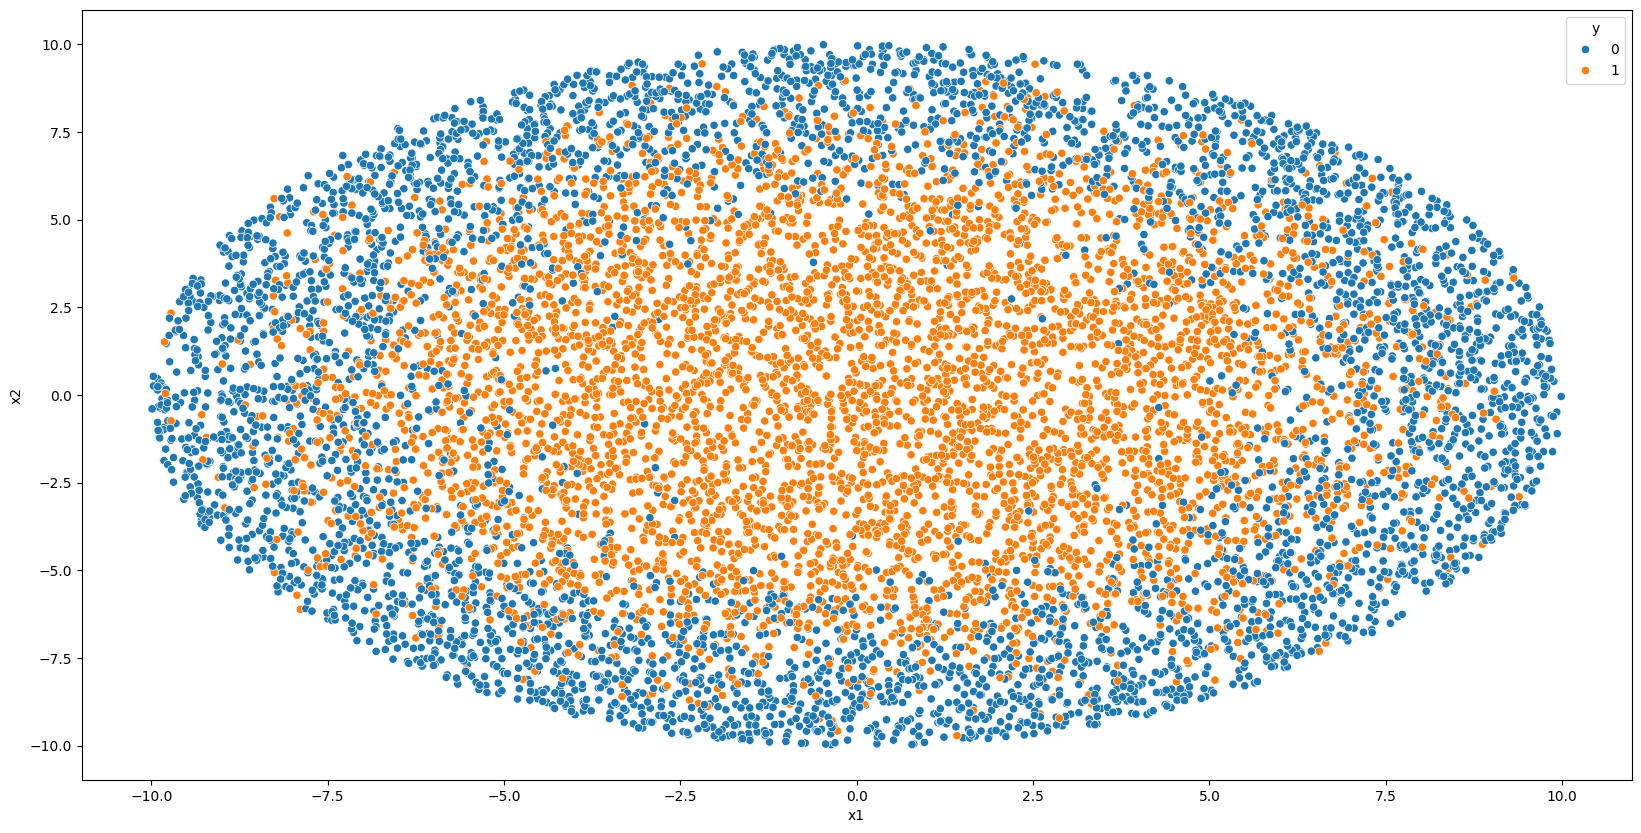

In [5]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df);

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?



1.   *Идеальную меодель будет построить тяжело из-за "шума" в данных*
2.   *Есть ли NaN значения, сбалансирована ли выборка.*
3.  *Метод опорных векторов с rbf ядром, бустинг, случайный лес.*



После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия.

In [7]:
df.isna().sum()

x1    0
x2    0
y     0
dtype: int64

Пропусков нет

In [8]:
df['y'].value_counts()

y
1    5097
0    4903
Name: count, dtype: int64

Классы сбалансированы

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5863636363636363


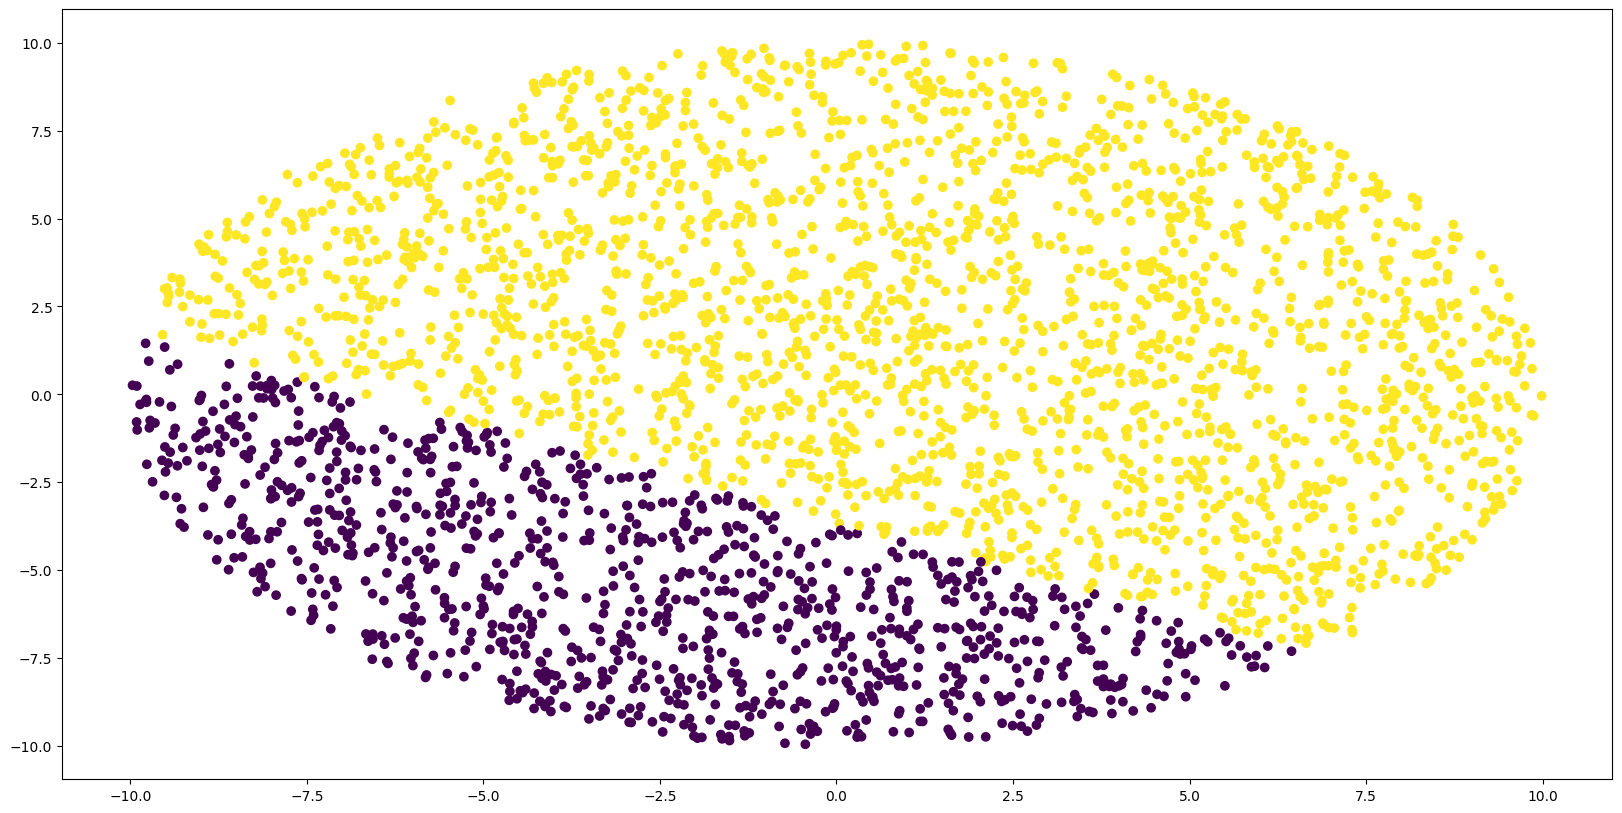

In [10]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)
predict_logit =  model.predict(X_test)
#predict_log_proba = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_logit)
plt.show()

*Как видно на графике, логистическая регрессия не может предсказывать датасет и разделяет классы по прямой линии.*

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Нужно добить фичи которые будут учитывать нелинейную структуру данных

Точность нашей модели 0.8436363636363636


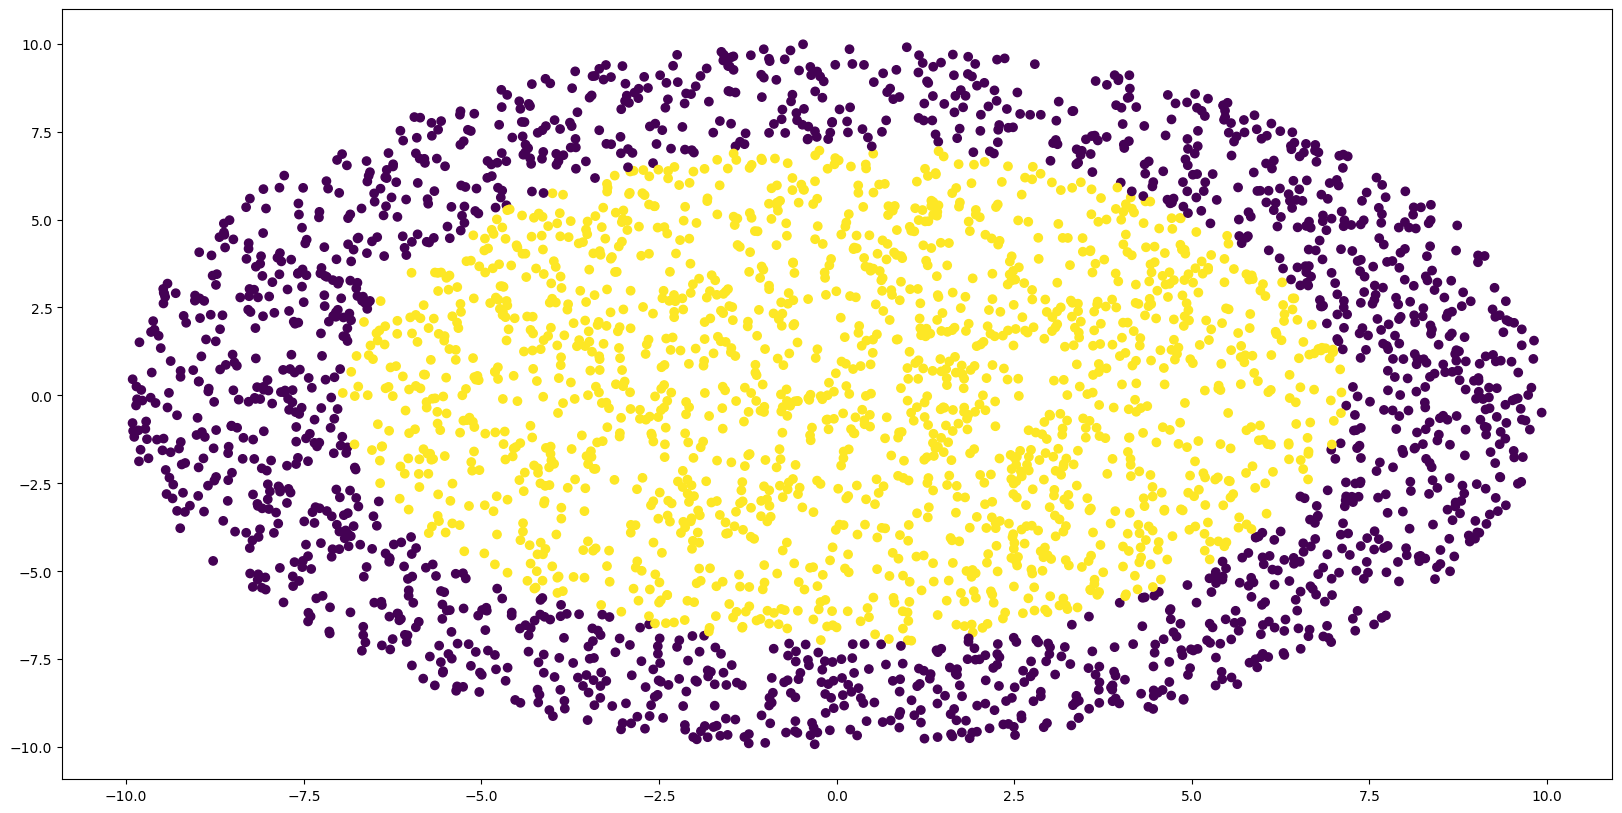

In [11]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

# Перейдем к полярной системе координат
# rho = np.sqrt(x1**2 + x2**2), phi = np.acrtan2(x1, x2)
df_new['rho'] = np.sqrt((df_new['x1'])**2 + (df_new['x2'])**2)
df_new['phi'] = np.arctan2(df_new['x1'], df_new['x2'])

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'rho', 'phi']],
                                                                    df_new['y'], test_size = 0.33)
model = LogisticRegression()
model.fit(X_train_new, y_train_new)
predict_logit = model.predict(X_test_new)
predict_log_proba = model.predict_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_logit)
plt.show()

*Как видим, результат логической регресии улучшился, однако есть минус. В датасете граница классов "размыта", однако в модели видно точную линнию границы классов.*

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение?

Нам нужно ограничить глубину дерева, чтобы не допустить переобучение.

Точность нашей модели 0.8203030303030303


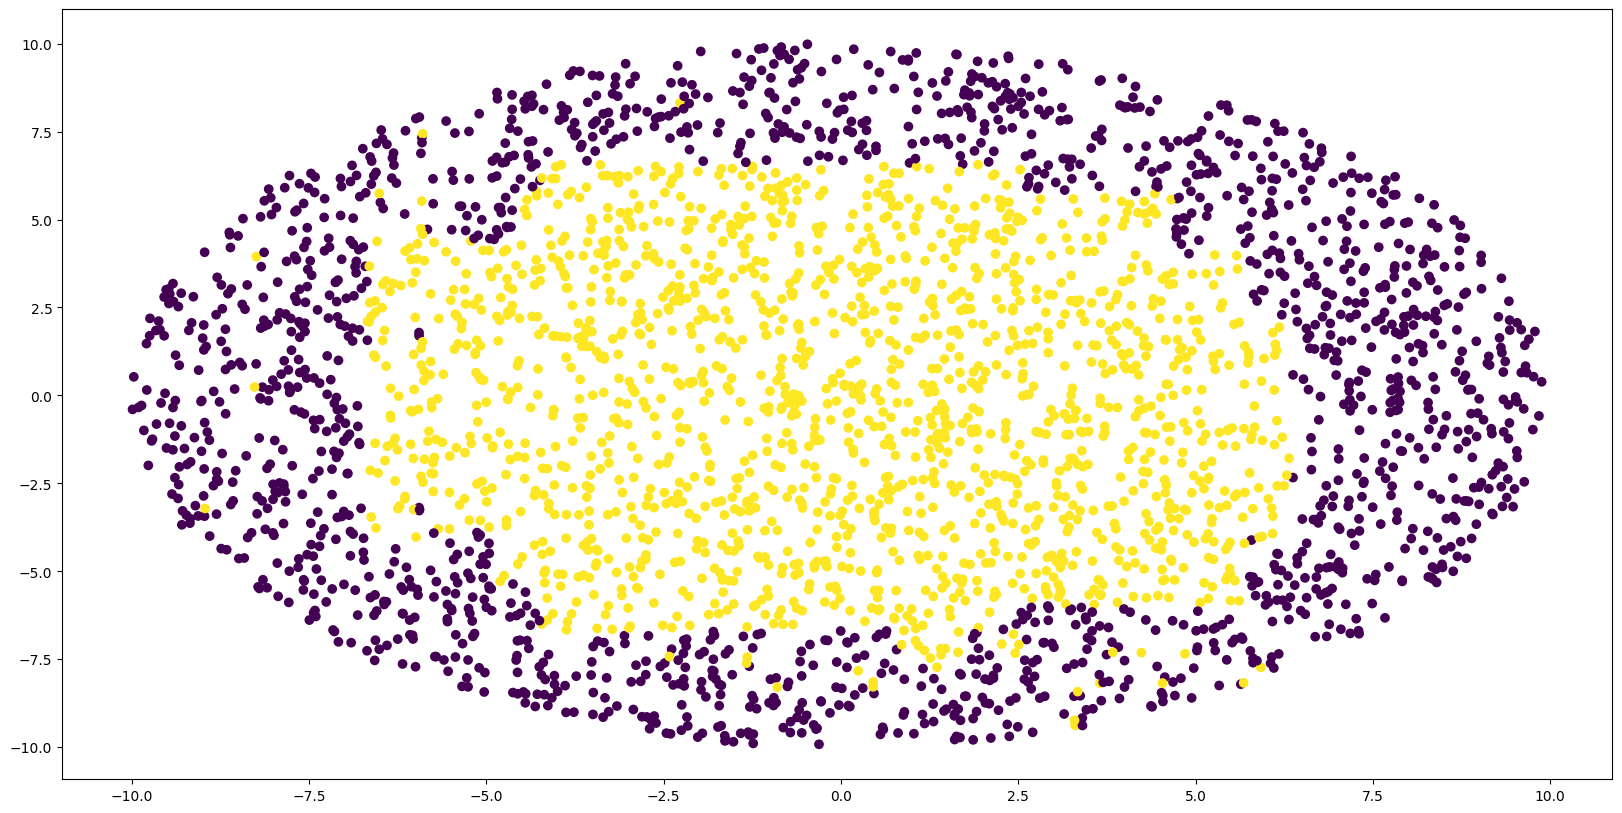

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
model = DecisionTreeClassifier(max_depth=8)
model.fit(X_train, y_train)
predict_tree = model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

*Как видно на графике, decision tree показало неплохую точность, однако эта модель плохо видит границу классов (при увеличении max_depth начинает понижаться качество модели из-за переобучения, хотя границы классов становяться ближе к истине).*

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

В данном случае ансамбль качество заметно не повысит, так как задача очень простая.         
В сравнении с decision tree, ансамбль почти всегда показывает результаты такие-же или лучше, из-за устойчивости к выбросам.

Точность нашей модели 0.8278787878787879


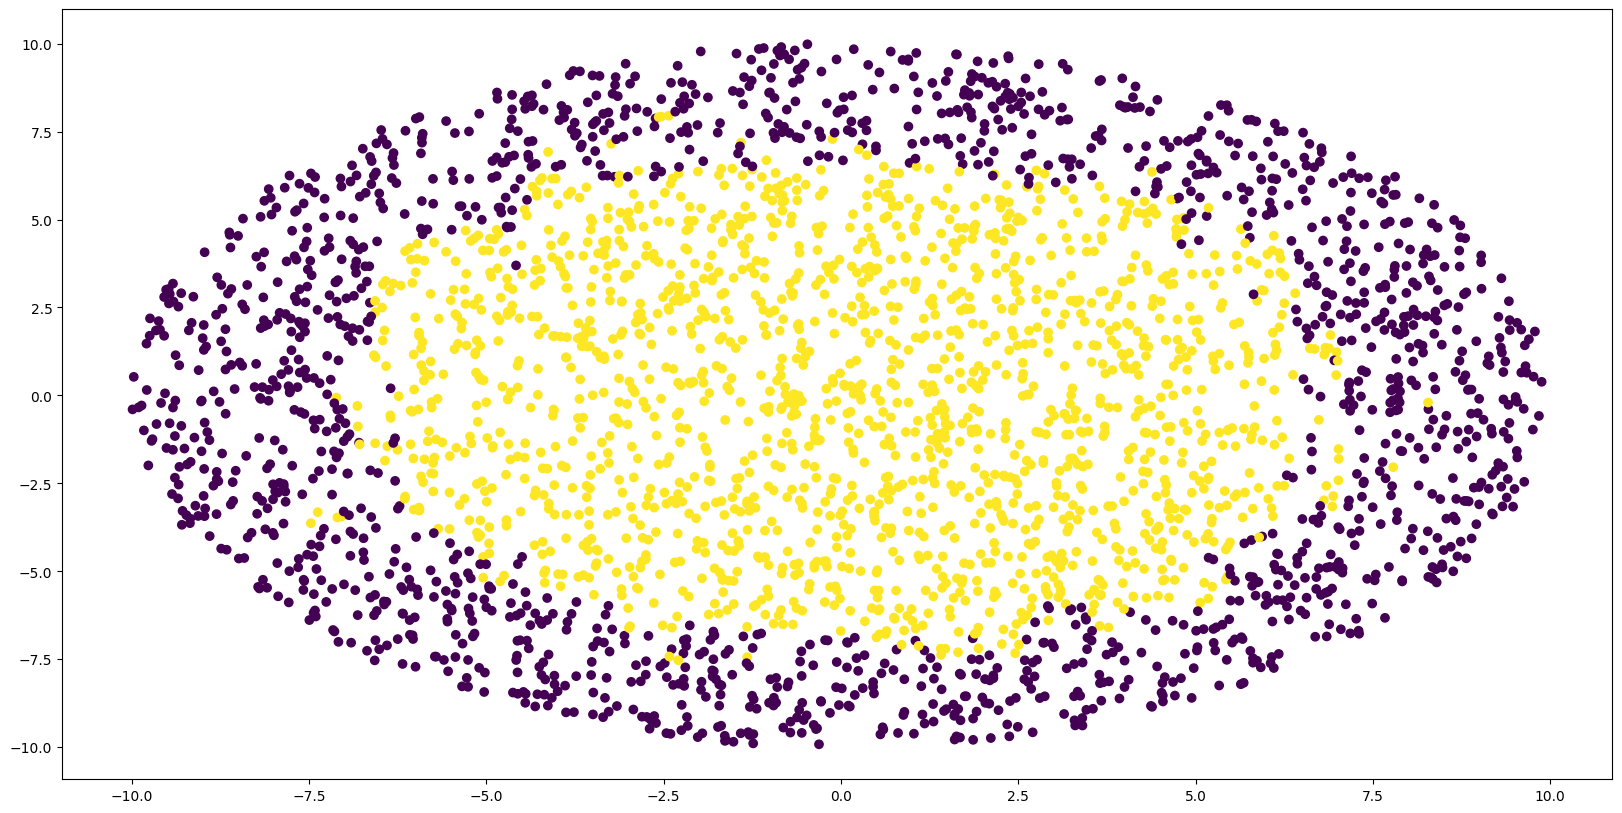

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

model = RandomForestClassifier(n_estimators=200, max_depth=12)
model.fit(X_train, y_train)
predict_forest = model.predict(X_test)

print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')


predict_forest_proba = (model.predict_proba(X_test)[:, 1] > 0.5).astype(int)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest)
plt.show()

*Качество по сравнению с decision tree заметно не повысилось (приблизительно на 0.01).*

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - (пример архитектуры - 2 слоя по 5 нейронов в каждом). Смотрим на тетрадку(семинар) и копипастим все нужное сюда!

In [ ]:
!pip install torchmetrics

In [ ]:
# Подгружаем понравившийся фраемворк
# Собираем сетку
# Учим и радуемся!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torchmetrics import Accuracy

In [ ]:
INPUT_SIZE = 4
OUTPUT_SIZE = 1
LEARNING_RATE = 1e-3
EPOCHS = 15
BATCH_SIZE = 16

Сделаем класс нейронной сети

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.fc1 = nn.Linear(INPUT_SIZE, 5) # первый слой 4 нейрона
    self.fc2 = nn.Linear(5, 5)
    self.fc3 = nn.Linear(5, OUTPUT_SIZE) # выход

  # функцией активации будет relu
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

Сделаем датасет для нейронной сети

In [ ]:
# Обучать будем на датасете с полярными координатами
X_train_t = torch.tensor(X_train_new.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train_new.values, dtype=torch.float32)

#расчитаем среднее значение и среднее отклонение для нормализации данных
mean = X_train_t.mean(dim=0)
std = X_train_t.std(dim=0)

X_test_t = torch.tensor(X_test_new.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test_new.values, dtype=torch.float32)

X_train_t = (X_train_t - mean) / std
X_test_t = (X_test_t - mean) / std

# Датасет будет иметь нормализованные значения x1, x2
train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_dataset, batch_size=10)
test_loader = DataLoader(test_dataset, batch_size=10)

In [ ]:
model = Net()
criterion = nn.BCELoss() # функция потерь Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE) # оптимизатор

accuracy = Accuracy(task='binary')

In [ ]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(1, EPOCHS + 1):
  running_acc = []
  running_loss = []

  for batch_idx, (data, target) in enumerate(train_loader):
    # Обучение модели
    model.train()

    optimizer.zero_grad()
    # Предсказание
    output = model(data)

    loss = criterion(output, target.unsqueeze(1))
    loss.backward()

    acc = accuracy(output, target.unsqueeze(1))
    optimizer.step()

    # Добавляем статистику за батч
    running_acc.append(acc.item())
    running_loss.append(loss.item())

  # Добавляем статистку за эпоху
  train_loss.append(np.mean(running_loss))
  train_acc.append(np.mean(running_acc))

  running_acc = []
  running_loss = []

  # Проверяем качество модели на тесовой выборке
  for batch_idx, (data, target) in enumerate(test_loader):
    model.eval()
    with torch.no_grad():
      output = model(data)
      loss = criterion(output, target.unsqueeze(1))
      acc = accuracy(output, target.unsqueeze(1))
      running_acc.append(acc.item())
      running_loss.append(loss.item())

  test_loss.append(np.mean(running_loss))
  test_acc.append(np.mean(running_acc))
  if epoch % 5 == 0:
    print(f"EPOCH {epoch} train_loss: {train_loss[-1]:.4f} train_acc: {train_acc[-1]:.4f} test_loss: {test_loss[-1]:.4f} test_acc: {test_acc[-1]:.4f}")

EPOCH 5 train_loss: 0.3682 train_acc: 0.8385 test_loss: 0.3553 test_acc: 0.8455
EPOCH 10 train_loss: 0.3664 train_acc: 0.8378 test_loss: 0.3547 test_acc: 0.8452
EPOCH 15 train_loss: 0.3657 train_acc: 0.8388 test_loss: 0.3544 test_acc: 0.8458


Функция предсказания

In [ ]:
def predict(model, x, threshold):
  model.eval()
  with torch.no_grad():
    output = model(x)
    predict_classes = (output > threshold).int() # получаем класс 0 или 1
  return predict_classes

Точность нашей модели 0.8457575757575757


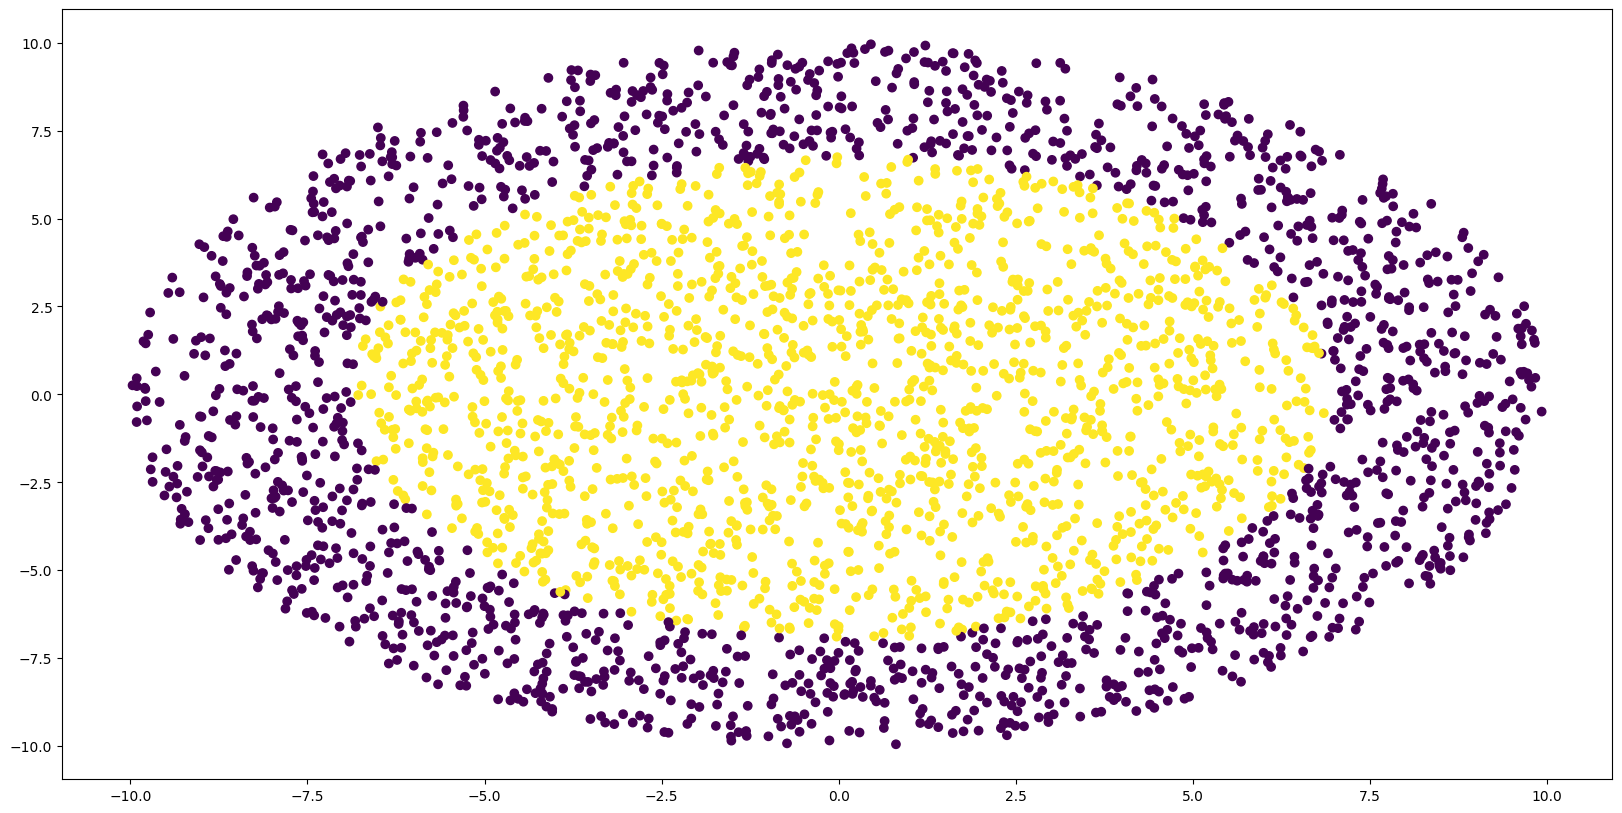

In [ ]:
predict_classes = predict(model, X_test_t, 0.5)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test_t)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_classes)
plt.show()

Итог

Наша нейронная сеть не показала значительного улучшения по сравнению с логистической регрессией с фичами, которые переводят координаты в полярные. Обе модели показали ~0.84 точность.  

Случайный лес и дерево показали себя немного хуже ~0.82 точности.

Дальнейшее увеличение нейронов в сети точность значительно не увеличиват, что нельзя сказать о скорости обучения